In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

%matplotlib inline

# Introduction to Peylin flux data

Open flux data files and try some analyis.

In [3]:
file_dir = './../../data/inversions/fco2_Rayner-C13-2018_June2018-ext3_1992-2012_monthlymean_XYT.nc'
Rayner = xr.open_dataset(file_dir)

In [4]:
Rayner

<xarray.Dataset>
Dimensions:           (latitude: 180, longitude: 360, time: 252)
Coordinates:
  * longitude         (longitude) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * latitude          (latitude) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * time              (time) object 1992-01-16 00:00:00 ... 2012-12-16 00:00:00
Data variables:
    Terrestrial_flux  (time, latitude, longitude) float32 ...
    ocean             (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.0
    history:      Fri Apr  5 01:24:44 2019: ncrename -a .FillValue,_FillValue...
    NCO:          "4.6.3"

In [5]:
time = Rayner.time
str(time.values[0])[:10]

'1992-01-16'

In [6]:
a=xr.DataArray(Rayner.Terrestrial_flux)
pd.DataFrame(a[0].values).iloc[range(67),:].sum().sum()

4387.6265

In [7]:
RT = Rayner.Terrestrial_flux.sel(time=str(time.values[0])[:10]).values[0]
RO = Rayner.ocean.sel(time='1992-06-16').values[0]

In [8]:
RT

array([[0.03179488, 0.03179488, 0.03179488, ..., 0.03179488, 0.03179488,
        0.03179488],
       [0.03179475, 0.03179475, 0.03179475, ..., 0.03179475, 0.03179475,
        0.03179475],
       [0.03179472, 0.03179472, 0.03179472, ..., 0.03179472, 0.03179472,
        0.03179472],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

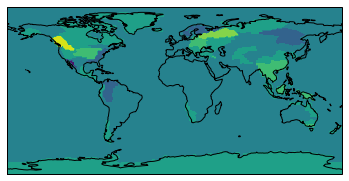

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(Rayner.longitude, Rayner.latitude, RT)

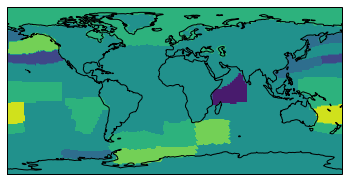

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(Rayner.longitude, Rayner.latitude, RO)

In [13]:
file_dir = './../../data/inversions/fco2_CAMS-V17-1-2018_June2018-ext3_1979-2017_monthlymean_XYT.nc'
CAMS = xr.open_dataset(file_dir)

In [14]:
CAMS

<xarray.Dataset>
Dimensions:           (latitude: 180, longitude: 360, time: 468)
Coordinates:
  * longitude         (longitude) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * latitude          (latitude) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * time              (time) object 1979-01-16 00:00:00 ... 2017-12-16 00:00:00
Data variables:
    fossil            (time, latitude, longitude) float32 ...
    Terrestrial_flux  (time, latitude, longitude) float32 ...
    Ocean_flux        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.0
    history:      Thu Apr  4 23:44:41 2019: ncrename -a .FillValue,_FillValue...
    NCO:          "4.6.3"

In [15]:
CAMS.Terrestrial_flux

<xarray.DataArray 'Terrestrial_flux' (time: 468, latitude: 180, longitude: 360)>
[30326400 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) object 1979-01-16 00:00:00 ... 2017-12-16 00:00:00
Attributes:
    title:    Terrestrial_flux
    units:    gC/m2/year

In [16]:
CAMS.Terrestrial_flux.sel(time='2017-11-16')

<xarray.DataArray 'Terrestrial_flux' (time: 1, latitude: 180, longitude: 360)>
array([[[6.597166e-09, 6.602390e-09, ..., 6.933514e-09, 6.597166e-09],
        [4.039088e-08, 4.044185e-08, ..., 4.367262e-08, 4.039088e-08],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) object 2017-11-16 00:00:00
Attributes:
    title:    Terrestrial_flux
    units:    gC/m2/year

In [17]:
land = CAMS.Terrestrial_flux.sel(time='2017-12-16')
land

<xarray.DataArray 'Terrestrial_flux' (time: 1, latitude: 180, longitude: 360)>
array([[[5.332498e-09, 5.336406e-09, ..., 5.449448e-09, 5.332498e-09],
        [2.431741e-08, 2.435555e-08, ..., 2.545849e-08, 2.431741e-08],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) object 2017-12-16 00:00:00
Attributes:
    title:    Terrestrial_flux
    units:    gC/m2/year

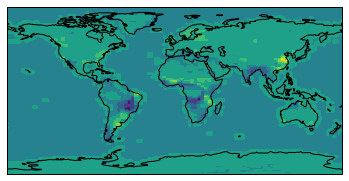

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(land.longitude, land.latitude, land.values[0])

In [19]:
ocean = CAMS.Ocean_flux.sel(time='2017-11-16')
ocean

<xarray.DataArray 'Ocean_flux' (time: 1, latitude: 180, longitude: 360)>
array([[[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ...,
        [-0.049694, -0.049657, ..., -0.049679, -0.049694],
        [-0.051127, -0.051123, ..., -0.051125, -0.051127]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) object 2017-11-16 00:00:00
Attributes:
    title:    Ocean_flux
    units:    gC/m2/year

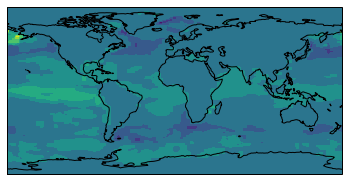

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(ocean.longitude, ocean.latitude, ocean.values[0])

In [21]:
fossil = CAMS.fossil.sel(time='2015-01-16', method='nearest')
fossil

<xarray.DataArray 'fossil' (time: 1, latitude: 180, longitude: 360)>
array([[[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) object 2015-01-16 00:00:00
Attributes:
    title:    fossil
    units:    gC/m2/year

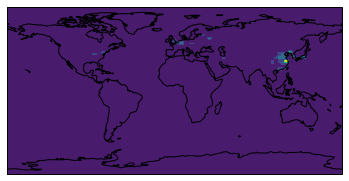

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(fossil.longitude, fossil.latitude, fossil.values[0])

# Introduction to integration of gridbox flux with their areas

In [23]:
CAMS.latitude

<xarray.DataArray 'latitude' (latitude: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  3

In [24]:
CAMS.longitude

<xarray.DataArray 'longitude' (longitude: 360)>
array([-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5])
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

Function to find the area of one gridbox in metres squared.

In [25]:
import sys

In [28]:
sys.path.append('./../../scripts/core/')
import inv_flux as ea

Example: Area between 20-21N and 20-21W.

In [29]:
ea.scalar_earth_area(20,21,20,21)

11581159925.416557

Example: Area between 0-1N and 0-1W.

In [30]:
ea.scalar_earth_area(0,1,0,1)/1000000

12363.683990261115

In [31]:
ea.scalar_earth_area(89,90,0,1)/1000000

107.89623558970828

Now we can get an array of gridbox areas with the function below.

In [32]:
grid = np.zeros((180,360))
for i in enumerate(range(-90,90)):
    grid[i[0],:] = ea.earth_area(i[1],i[1]+1,range(-180,180),range(-179,181))[0]

In [33]:
grid

array([[1.07896236e+08, 1.07896236e+08, 1.07896236e+08, ...,
        1.07896236e+08, 1.07896236e+08, 1.07896236e+08],
       [3.23655841e+08, 3.23655841e+08, 3.23655841e+08, ...,
        3.23655841e+08, 3.23655841e+08, 3.23655841e+08],
       [5.39316857e+08, 5.39316857e+08, 5.39316857e+08, ...,
        5.39316857e+08, 5.39316857e+08, 5.39316857e+08],
       ...,
       [5.39316857e+08, 5.39316857e+08, 5.39316857e+08, ...,
        5.39316857e+08, 5.39316857e+08, 5.39316857e+08],
       [3.23655841e+08, 3.23655841e+08, 3.23655841e+08, ...,
        3.23655841e+08, 3.23655841e+08, 3.23655841e+08],
       [1.07896236e+08, 1.07896236e+08, 1.07896236e+08, ...,
        1.07896236e+08, 1.07896236e+08, 1.07896236e+08]])

Now multiply the fluxes by the area in each gridbox and sum it up to get the net global sink (at one time point).

In [34]:
land_flux = CAMS_V17.Terrestrial_flux.sel(time='2017-12-16').values[0]
land_flux

array([[5.3324976e-09, 5.3364064e-09, 5.3637663e-09, ..., 6.2680985e-09,
        5.4494480e-09, 5.3324976e-09],
       [2.4317412e-08, 2.4355552e-08, 2.4622503e-08, ..., 3.3446028e-08,
        2.5458490e-08, 2.4317412e-08],
       [3.0211840e-08, 3.0259617e-08, 3.0594048e-08, ..., 3.7863785e-08,
        3.1168334e-08, 3.0211840e-08],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [35]:
total_sink = land_flux*grid
total_sink

array([[ 0.57535641,  0.57577817,  0.57873019, ...,  0.67630423,
         0.58797493,  0.57535641],
       [ 7.87047245,  7.88281673,  7.96921695, ..., 10.82500236,
         8.23978912,  7.87047245],
       [16.29375466, 16.31952155, 16.4998859 , ..., 20.42057751,
        16.80960776, 16.29375466],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Net global terrestrial sink Dec 2017, gC of Carbon (per year or in just that month?)

In [36]:
np.sum(total_sink)

5300820115999728.0

Net global terrestrial sink Dec 2017, gtC of Carbon (per year or in just that month?)

In [37]:
np.sum(total_sink)*1e-15

5.300820115999729

## Semihemispheres and their fluxes

In [38]:
lat = CAMS_V17.latitude
lon = CAMS_V17.longitude

In [39]:
trop = land_flux[(lat>-23) & (lat<23)]

In [40]:
south = land_flux[lat<-23]

In [41]:
north = land_flux[lat>23]

In [42]:
trop_grid = ea.earth_area_grid(lat[(lat>-23) & (lat<23)], lon)

In [43]:
south_grid = ea.earth_area_grid(lat[lat<-23], lon)

In [44]:
north_grid = ea.earth_area_grid(lat[lat>23], lon)

In [45]:
a=south*south_grid

In [46]:
b=trop*trop_grid

In [47]:
c=north*north_grid

In [48]:
(np.sum(a)+np.sum(b)+np.sum(c))/1000000000000000

5.300820115999727

In [49]:
t1=np.array([1,2,3])
t2=np.array([5,6,7])

In [50]:
t1*t2

array([ 5, 12, 21])

In [51]:
np.sum(t1*t2)

38

In [52]:
np.sum(t1)*np.sum(t2)

108

In [53]:
list(CAMS_V17.variables)

['longitude', 'latitude', 'time', 'fossil', 'Terrestrial_flux', 'Ocean_flux']

# Intro to temporal integration

## Dataframe with all time points

In [54]:
Rayner.time

<xarray.DataArray 'time' (time: 252)>
array([cftime.Datetime360Day(1992, 1, 16, 0, 0, 0, 0, 6, 16),
       cftime.Datetime360Day(1992, 2, 16, 0, 0, 0, 0, 1, 46),
       cftime.Datetime360Day(1992, 3, 16, 0, 0, 0, 0, 3, 76), ...,
       cftime.Datetime360Day(2012, 10, 16, 0, 0, 0, 0, 0, 286),
       cftime.Datetime360Day(2012, 11, 16, 0, 0, 0, 0, 2, 316),
       cftime.Datetime360Day(2012, 12, 16, 0, 0, 0, 0, 4, 346)], dtype=object)
Coordinates:
  * time     (time) object 1992-01-16 00:00:00 ... 2012-12-16 00:00:00
Attributes:
    standard_name:  time
    title:          time
    axis:           T
    time_origin:    01-JAN-1900

In [55]:
Rayner.Terrestrial_flux.sel(time=Rayner.time[2]).values

array([[0.0217329 , 0.0217329 , 0.0217329 , ..., 0.0217329 , 0.0217329 ,
        0.0217329 ],
       [0.02173281, 0.02173281, 0.02173281, ..., 0.02173281, 0.02173281,
        0.02173281],
       [0.02173279, 0.02173279, 0.02173279, ..., 0.02173279, 0.02173279,
        0.02173279],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [56]:
Rayner.Terrestrial_flux.sel(time='1992-03-16').values[0].shape

(180, 360)

In [57]:
Rayner.time[0]

<xarray.DataArray 'time' ()>
array(cftime.Datetime360Day(1992, 1, 16, 0, 0, 0, 0, 6, 16), dtype=object)
Coordinates:
    time     object 1992-01-16 00:00:00
Attributes:
    standard_name:  time
    title:          time
    axis:           T
    time_origin:    01-JAN-1900

In [58]:
str(Rayner.time[0].values)[:10]

'1992-01-16'

In [59]:
range(Rayner.time.size)

range(0, 252)

In [60]:
df = pd.DataFrame(np.zeros((9,9)))
df

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df.loc[0,:]=np.array(single_time.loc[0])
df

NameError: name 'single_time' is not defined

In [62]:
multiple_time = ea.spatial_integration(data='./../data/fco2_Rayner-C13-2018_June2018-ext3_1992-2012_monthlymean_XYT.nc',
                                    variables=['Terrestrial_flux','ocean'])
multiple_time

AttributeError: module 'inv_flux' has no attribute 'spatial_integration'

In [63]:
multiple_time.loc[0,'earth_land_total']

NameError: name 'multiple_time' is not defined

In [64]:
ea.single_time_output(multiple_time, 0, data_path='./../data/fco2_Rayner-C13-2018_June2018-ext3_1992-2012_monthlymean_XYT.nc')

AttributeError: module 'inv_flux' has no attribute 'single_time_output'

In [65]:
import importlib as ilib
ilib.reload(ea)

<module 'inv_flux' from './../../scripts/core\\inv_flux.py'>

## Integrating in time from dataframe

In [66]:
Rayner_df = ea.spatial_integration(data='./../data/fco2_Rayner-C13-2018_June2018-ext3_1992-2012_monthlymean_XYT.nc',
                                    variables=['Terrestrial_flux','ocean'])
Rayner_df

AttributeError: module 'inv_flux' has no attribute 'spatial_integration'

In [7]:
Rayner_df['time'][0][:4]

TypeError: 'cftime._cftime.Datetime360Day' object is not subscriptable

In [8]:
Rayner_df['time'][0][5:7]

TypeError: 'cftime._cftime.Datetime360Day' object is not subscriptable

### Year

In [9]:
index = []
for (i,time) in enumerate(Rayner_df['time']):
    if time.year == 1992:
        index.append(i)
index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [10]:
Rayner_df.iloc[index,1:].sum()

earth_land_total    -29.447621
south_land_total      2.690715
trop_land_total      -9.738235
north_land_total    -22.400101
earth_ocean_total    -3.002181
south_ocean_total     6.117249
trop_ocean_total     -5.815365
north_ocean_total    -3.304065
dtype: float64

In [11]:
min_year = Rayner_df.time[0].year
max_year = Rayner_df.time[Rayner_df.time.size-1].year

Rayner_year = pd.DataFrame(columns=
                                ['Year',
                                 'earth_land_total',
                                 'south_land_total',
                                 'trop_land_total',
                                 'north_land_total',
                                 'earth_ocean_total',
                                 'south_ocean_total',
                                 'trop_ocean_total',
                                 'north_ocean_total']
                               )

for (j,year) in enumerate(range(min_year, max_year+1)):
    index = []
    for (i,time) in enumerate(Rayner_df['time']):
        if time.year == year:
            index.append(i)
    Rayner_year.loc[j,:] = Rayner_df.iloc[index,1:].sum()

Rayner_year['Year'] = range(min_year, max_year+1)
Rayner_year

,Year,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,1992,-29.4476,2.69072,-9.73824,-22.4001,-3.00218,6.11725,-5.81536,-3.30407
1,1993,-40.4063,-4.46368,-4.55531,-31.3873,14.9359,12.9816,-0.143693,2.09792
2,1994,-9.234,3.47649,6.69389,-19.4044,1.43749,6.95225,-5.638,0.123243
3,1995,-10.1931,-2.91971,15.0366,-22.31,2.70502,9.56498,-5.57833,-1.28163
4,1996,-27.9445,-2.86996,-4.60911,-20.4655,4.72992,8.96086,-4.0432,-0.18774
5,1997,-6.69302,4.73365,13.7156,-25.1423,-5.64755,2.63312,-7.46955,-0.811115
6,1998,11.9143,8.19285,27.1144,-23.3929,-5.11714,2.20758,-7.57744,0.252723
7,1999,-25.7038,0.678663,2.41303,-28.7955,1.68701,5.99328,-5.19122,0.884945
8,2000,-25.885,-4.73236,3.39231,-24.545,3.57465,6.58475,-3.51686,0.50676
9,2001,-24.9975,-2.46616,3.3089,-25.8402,2.41762,8.3095,-5.66343,-0.228448


In [16]:
ea.year_integration(Rayner_df)

,Year,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,1992,-29.4476,2.69072,-9.73824,-22.4001,-3.00218,6.11725,-5.81536,-3.30407
1,1993,-40.4063,-4.46368,-4.55531,-31.3873,14.9359,12.9816,-0.143693,2.09792
2,1994,-9.234,3.47649,6.69389,-19.4044,1.43749,6.95225,-5.638,0.123243
3,1995,-10.1931,-2.91971,15.0366,-22.31,2.70502,9.56498,-5.57833,-1.28163
4,1996,-27.9445,-2.86996,-4.60911,-20.4655,4.72992,8.96086,-4.0432,-0.18774
5,1997,-6.69302,4.73365,13.7156,-25.1423,-5.64755,2.63312,-7.46955,-0.811115
6,1998,11.9143,8.19285,27.1144,-23.3929,-5.11714,2.20758,-7.57744,0.252723
7,1999,-25.7038,0.678663,2.41303,-28.7955,1.68701,5.99328,-5.19122,0.884945
8,2000,-25.885,-4.73236,3.39231,-24.545,3.57465,6.58475,-3.51686,0.50676
9,2001,-24.9975,-2.46616,3.3089,-25.8402,2.41762,8.3095,-5.66343,-0.228448


In [20]:
(Rayner_year==ea.year_integration(Rayner_df)).all()

Year                 True
earth_land_total     True
south_land_total     True
trop_land_total      True
north_land_total     True
earth_ocean_total    True
south_ocean_total    True
trop_ocean_total     True
north_ocean_total    True
dtype: bool

### Decadal

In [12]:
index = []
for (i,time) in enumerate(Rayner_df['time']):
    if time.year in range(1990, 2000):
        index.append(i)

In [13]:
Rayner_df.iloc[index,1:].sum()

earth_land_total    -137.708055
south_land_total       9.519020
trop_land_total       46.070837
north_land_total    -193.297912
earth_ocean_total     11.728425
south_ocean_total     55.410943
trop_ocean_total     -41.456796
north_ocean_total     -2.225722
dtype: float64

In [14]:
min_decade = int(Rayner_df.time[0].year/10)*10
max_decade = int(Rayner_df.time[Rayner_df.time.size-1].year/10)*10

Rayner_decade = pd.DataFrame(columns=
                                ['Decade',
                                 'earth_land_total',
                                 'south_land_total',
                                 'trop_land_total',
                                 'north_land_total',
                                 'earth_ocean_total',
                                 'south_ocean_total',
                                 'trop_ocean_total',
                                 'north_ocean_total']
                               )

for (j,decade) in enumerate(range(min_decade, max_decade+10,10)):
    index = []
    for (i,time) in enumerate(Rayner_df['time']):
        if time.year in range(decade, decade+10):
            index.append(i)
    Rayner_decade.loc[j,:] = Rayner_df.iloc[index,1:].sum()

Rayner_decade['Decade'] = range(min_decade, max_decade+10,10)
Rayner_decade

,Decade,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,1990,-137.708,9.51902,46.0708,-193.298,11.7284,55.4109,-41.4568,-2.22572
1,2000,-247.845,-15.5226,52.1971,-284.52,-2.74848,71.3748,-52.2913,-21.8319
2,2010,-114.824,-10.7725,3.33853,-107.39,1.21282,16.4627,-12.6477,-2.60223


In [21]:
ea.decade_integration(Rayner_df)

,Decade,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,1990,-137.708,9.51902,46.0708,-193.298,11.7284,55.4109,-41.4568,-2.22572
1,2000,-247.845,-15.5226,52.1971,-284.52,-2.74848,71.3748,-52.2913,-21.8319
2,2010,-114.824,-10.7725,3.33853,-107.39,1.21282,16.4627,-12.6477,-2.60223


In [22]:
(Rayner_decade==ea.decade_integration(Rayner_df)).all()

Decade               True
earth_land_total     True
south_land_total     True
trop_land_total      True
north_land_total     True
earth_ocean_total    True
south_ocean_total    True
trop_ocean_total     True
north_ocean_total    True
dtype: bool

### Whole

In [25]:
Rayner_whole = Rayner_df.iloc[:,1:].sum()
Rayner_whole

earth_land_total    -500.376996
south_land_total     -16.776086
trop_land_total      101.606510
north_land_total    -585.207420
earth_ocean_total     10.192766
south_ocean_total    143.248454
trop_ocean_total    -106.395823
north_ocean_total    -26.659865
dtype: float64

In [26]:
ea.whole_time_integration(Rayner_df)

earth_land_total    -500.376996
south_land_total     -16.776086
trop_land_total      101.606510
north_land_total    -585.207420
earth_ocean_total     10.192766
south_ocean_total    143.248454
trop_ocean_total    -106.395823
north_ocean_total    -26.659865
dtype: float64

In [27]:
(Rayner_whole==ea.whole_time_integration(Rayner_df)).all()

True

# Converting yearly averaged monthly fluxes into true monthly units

In [6]:
Rayner

<xarray.Dataset>
Dimensions:           (latitude: 180, longitude: 360, time: 252)
Coordinates:
  * longitude         (longitude) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * latitude          (latitude) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * time              (time) object 1992-01-16 00:00:00 ... 2012-12-16 00:00:00
Data variables:
    Terrestrial_flux  (time, latitude, longitude) float32 ...
    ocean             (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.0
    history:      Fri Apr  5 01:24:44 2019: ncrename -a .FillValue,_FillValue...
    NCO:          "4.6.3"

In [11]:
sample = Rayner['Terrestrial_flux'].sel(time=Rayner.time[0]).values
sample

array([[0.03179488, 0.03179488, 0.03179488, ..., 0.03179488, 0.03179488,
        0.03179488],
       [0.03179475, 0.03179475, 0.03179475, ..., 0.03179475, 0.03179475,
        0.03179475],
       [0.03179472, 0.03179472, 0.03179472, ..., 0.03179472, 0.03179472,
        0.03179472],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [12]:
# Dividing by 12 is a simple solution
sample/12

array([[0.00264957, 0.00264957, 0.00264957, ..., 0.00264957, 0.00264957,
        0.00264957],
       [0.00264956, 0.00264956, 0.00264956, ..., 0.00264956, 0.00264956,
        0.00264956],
       [0.00264956, 0.00264956, 0.00264956, ..., 0.00264956, 0.00264956,
        0.00264956],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [17]:
# But each month has a different amount of days
days = [31,28,31,30,31,30,31,31,30,31,30,31]
sample*(days[0]/365)

array([[0.00270039, 0.00270039, 0.00270039, ..., 0.00270039, 0.00270039,
        0.00270039],
       [0.00270038, 0.00270038, 0.00270038, ..., 0.00270038, 0.00270038,
        0.00270038],
       [0.00270037, 0.00270037, 0.00270037, ..., 0.00270037, 0.00270037,
        0.00270037],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [45]:
np.arange(0,12)%12

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [92]:
import importlib as ilib
ilib.reload(ea)

<module 'Scripts.flux_area_integration' from './../Scripts/flux_area_integration.py'>

In [89]:
# without dividing
wito = ea.spatial_integration(Rayner,['Terrestrial_flux', 'ocean'], time=(49,55))
wito

,time,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,1996-02-16 00:00:00,-5.17681,-0.617821,-2.72979,-1.8292,0.317813,0.713038,-0.396321,0.00109692
1,1996-03-16 00:00:00,-10.1285,-0.298527,-4.23495,-5.59499,-9.85854e-05,1.08088,-0.947074,-0.133909
2,1996-04-16 00:00:00,-2.12614,0.400687,-0.716972,-1.80986,-0.260814,0.668399,-1.26887,0.339654
3,1996-05-16 00:00:00,5.39151,-0.0287655,1.91283,3.50744,0.384121,0.752217,-0.308846,-0.0592501
4,1996-06-16 00:00:00,-0.403305,-1.09503,-1.38943,2.08115,0.536013,0.749385,-0.312654,0.0992822
5,1996-07-16 00:00:00,-8.42194,-1.51248,-3.68542,-3.22404,0.925139,0.78832,-0.06746,0.204278
6,1996-08-16 00:00:00,-8.14957,-1.32393,-3.33499,-3.49066,-0.184004,0.634059,-0.311148,-0.506915


In [87]:
# with dividing
wit = ea.spatial_integration(Rayner,['Terrestrial_flux', 'ocean'], time=(49,55))
wit

,time,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,1996-02-16 00:00:00,-0.397125,-0.0473944,-0.209409,-0.140322,0.0243802,0.0546988,-0.0304027,8.41467e-05
1,1996-03-16 00:00:00,-0.860226,-0.0253543,-0.359681,-0.475191,-8.3737e-06,0.0918011,-0.0804364,-0.0113731
2,1996-04-16 00:00:00,-0.174751,0.0329332,-0.0589292,-0.148755,-0.0214368,0.0549369,-0.10429,0.0279167
3,1996-05-16 00:00:00,0.457909,-0.0024431,0.16246,0.297892,0.032624,0.0638869,-0.0262307,-0.0050322
4,1996-06-16 00:00:00,-0.0331483,-0.0900022,-0.114199,0.171053,0.0440559,0.0615933,-0.0256976,0.00816018
5,1996-07-16 00:00:00,-0.715288,-0.128457,-0.313009,-0.273822,0.0785734,0.0669532,-0.00572948,0.0173496
6,1996-08-16 00:00:00,-0.692155,-0.112443,-0.283245,-0.296467,-0.0156277,0.0538516,-0.0264262,-0.0430531


In [90]:
wito.iloc[:,1:]/wit.iloc[:,1:]

,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,13.0357,13.0357,13.0357,13.0357,13.0357,13.0357,13.0357,13.0358
1,11.7742,11.7742,11.7742,11.7742,11.7732,11.7742,11.7742,11.7742
2,12.1667,12.1667,12.1667,12.1667,12.1667,12.1667,12.1667,12.1667
3,11.7742,11.7742,11.7742,11.7742,11.7742,11.7742,11.7742,11.7742
4,12.1667,12.1667,12.1667,12.1667,12.1667,12.1667,12.1667,12.1667
5,11.7742,11.7742,11.7742,11.7742,11.7742,11.7742,11.7742,11.7742
6,11.7742,11.7742,11.7742,11.7742,11.7742,11.7742,11.7742,11.7742


In [91]:
# All done!

In [94]:
final = ea.spatial_integration(Rayner,['Terrestrial_flux', 'ocean'])
final

,time,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,1992-01-16 00:00:00,-0.206387,0.00262046,-0.184588,-0.0244196,0.0915499,0.0801271,-0.0126573,0.02408
1,1992-02-16 00:00:00,-0.32326,0.0148799,-0.138804,-0.199336,0.0114948,0.0372992,-0.0339515,0.00814714
2,1992-03-16 00:00:00,-0.455497,-0.005087,-0.104469,-0.345941,0.00561883,0.0864351,-0.0636996,-0.0171167
3,1992-04-16 00:00:00,-0.00856157,0.0402408,0.0306667,-0.0794691,0.044103,0.0723724,-0.0453629,0.0170934
4,1992-05-16 00:00:00,0.179045,0.0245111,0.15515,-0.000615481,0.0225338,0.0744753,-0.0109653,-0.0409763
5,1992-06-16 00:00:00,-0.225475,-0.025228,-0.0700347,-0.130212,-0.111758,-0.00992819,-0.0666191,-0.0352107
6,1992-07-16 00:00:00,-0.697192,0.0797032,-0.311337,-0.465558,-0.0910569,-0.0238922,-0.0394592,-0.0277055
7,1992-08-16 00:00:00,-0.42653,0.0988206,-0.249377,-0.275973,-0.19569,-0.0554427,-0.0739632,-0.0662838
8,1992-09-16 00:00:00,-0.215082,0.0945276,0.0111171,-0.320727,-0.065589,0.0154006,-0.0699569,-0.0110327
9,1992-10-16 00:00:00,0.0799265,0.0145738,0.0478405,0.0175122,-0.0284315,0.0588602,-0.0310148,-0.0562769


In [100]:
ea.year_integration(final)[['Year','earth_ocean_total', 'earth_land_total']]

,Year,earth_ocean_total,earth_land_total
0,1992,-0.252198,-2.44695
1,1993,1.24133,-3.34941
2,1994,0.112975,-0.734497
3,1995,0.225526,-0.811956
4,1996,0.396192,-2.30852
5,1997,-0.466631,-0.534001
6,1998,-0.426082,1.01841
7,1999,0.143578,-2.13609
8,2000,0.298124,-2.13503
9,2001,0.201494,-2.04285


# Selecting time points from time arguments in functions

In [9]:
time='1992-01'
Rayner.sel(time=time)

<xarray.Dataset>
Dimensions:           (latitude: 180, longitude: 360, time: 1)
Coordinates:
  * longitude         (longitude) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * latitude          (latitude) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * time              (time) object 1992-01-16 00:00:00
Data variables:
    Terrestrial_flux  (time, latitude, longitude) float32 ...
    ocean             (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.0
    history:      Fri Apr  5 01:24:44 2019: ncrename -a .FillValue,_FillValue...
    NCO:          "4.6.3"

In [48]:
Rayner.sel(time='1992-01').time.values[0]

cftime.Datetime360Day(1992, 1, 16, 0, 0, 0, 0, 6, 16)

In [69]:
('1992-01','1993-01')

('1992-01', '1993-01')

In [108]:
j = []
for i in t:
    j.append(i.strftime())

collect = []
for time in j:
    if '01' in time:
        collect.append(time)
collect

['1992-01-16 00:00:00',
 '1993-01-16 00:00:00',
 '1994-01-16 00:00:00',
 '1995-01-16 00:00:00',
 '1996-01-16 00:00:00',
 '1997-01-16 00:00:00',
 '1998-01-16 00:00:00',
 '1999-01-16 00:00:00',
 '2000-01-16 00:00:00',
 '2001-01-16 00:00:00',
 '2001-02-16 00:00:00',
 '2001-03-16 00:00:00',
 '2001-04-16 00:00:00',
 '2001-05-16 00:00:00',
 '2001-06-16 00:00:00',
 '2001-07-16 00:00:00',
 '2001-08-16 00:00:00',
 '2001-09-16 00:00:00',
 '2001-10-16 00:00:00',
 '2001-11-16 00:00:00',
 '2001-12-16 00:00:00',
 '2002-01-16 00:00:00',
 '2003-01-16 00:00:00',
 '2004-01-16 00:00:00',
 '2005-01-16 00:00:00',
 '2006-01-16 00:00:00',
 '2007-01-16 00:00:00',
 '2008-01-16 00:00:00',
 '2009-01-16 00:00:00',
 '2010-01-16 00:00:00',
 '2010-02-16 00:00:00',
 '2010-03-16 00:00:00',
 '2010-04-16 00:00:00',
 '2010-05-16 00:00:00',
 '2010-06-16 00:00:00',
 '2010-07-16 00:00:00',
 '2010-08-16 00:00:00',
 '2010-09-16 00:00:00',
 '2010-10-16 00:00:00',
 '2010-11-16 00:00:00',
 '2010-12-16 00:00:00',
 '2011-01-16 00:

In [79]:
time_point = str(time_range[0].year)+'-'+str(time_range[0].month)
time_point

'1992-1'

In [82]:
Rayner['Terrestrial_flux'].sel(time='1992-10').values*(31/365)

array([[[0.00108228, 0.00108228, 0.00108228, ..., 0.00108228,
         0.00108228, 0.00108228],
        [0.00108227, 0.00108227, 0.00108227, ..., 0.00108227,
         0.00108227, 0.00108227],
        [0.00108227, 0.00108227, 0.00108227, ..., 0.00108227,
         0.00108227, 0.00108227],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)

In [109]:
('1992-01','1993-01')

('1992-01', '1993-01')

In [19]:
tt=pd.date_range(start='1992-01-16', end='1993-01-16', freq='M')
tt

DatetimeIndex(['1992-01-31', '1992-02-29', '1992-03-31', '1992-04-30',
               '1992-05-31', '1992-06-30', '1992-07-31', '1992-08-31',
               '1992-09-30', '1992-10-31', '1992-11-30', '1992-12-31'],
              dtype='datetime64[ns]', freq='M')

In [20]:
p=tt.strftime('%Y-%m')
p

Index(['1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
       '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12'],
      dtype='object')

In [128]:
type(p)

pandas.core.indexes.base.Index

In [16]:
to=Rayner.time.values[-1].strftime('%Y-%m')
to

'2012-12'

In [15]:
Rayner['Terrestrial_flux'].sel(time=to).values*(31/365)

array([[[0.00270039, 0.00270039, 0.00270039, ..., 0.00270039,
         0.00270039, 0.00270039],
        [0.00270038, 0.00270038, 0.00270038, ..., 0.00270038,
         0.00270038, 0.00270038],
        [0.00270037, 0.00270037, 0.00270037, ..., 0.00270037,
         0.00270037, 0.00270037],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)

In [17]:
Rayner.time.values[0].strftime('%Y-%m')

'1992-01'

In [138]:
%%time
ea.spatial_integration(Rayner,
                       variables=['Terrestrial_flux', 'ocean'],
                       start_time= '2011-10',
                       end_time= None
                      )

CPU times: user 357 ms, sys: 106 µs, total: 357 ms
Wall time: 350 ms


,time,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,2011-10,0.15951995622799775,-0.021534123120933613,0.3060956442384266,-0.12504156488949533,0.09447356871211735,0.09073208885995798,0.006229174538139041,-0.0024876946859796966
1,2011-11,0.15868802094572462,0.020926015136491415,0.07262639128714012,0.06513561452209307,0.13284299656173681,0.0904349946603026,0.02335556035283759,0.019052441548596623
2,2011-12,-0.058649855196744045,-0.011204920104049262,0.13127086183380177,-0.17871579692649656,0.07240576578764006,0.06934220401656474,-0.004379019987944275,0.007442581759019611
3,2012-01,-0.14471926879389108,-0.02113403435347263,-0.02004576258373921,-0.10353947185667925,0.02708113778559401,0.02242136558946879,-0.026689753450821457,0.03134952564694668
4,2012-02,-0.32385886984648027,-0.008342218656268809,0.01286353991506714,-0.32838019110527855,0.02101606833130435,0.01646417593593562,-0.022103327513160874,0.026655219908529603
5,2012-03,-0.652256607917971,-0.07791188172981389,-0.10586784750668632,-0.46847687868147087,-0.025698438105945777,0.028324252102757318,-0.04870569465909181,-0.0053169955496112885
6,2012-04,-0.5905798508007917,-0.05941403490533634,-0.1554328141868758,-0.3757330017085794,-0.05115136508114847,0.008927818886559843,-0.05885991285818919,-0.001219271109519129
7,2012-05,-0.4519722965433398,-0.06952016010258306,-0.07012189286988858,-0.31233024357086825,-0.04691354434327996,0.010641941887466675,-0.031518614459344264,-0.02603687177140239
8,2012-06,-0.48061838815428976,-0.04629656332798152,0.027588221375504037,-0.46191004620181225,-0.06976269501716584,0.029491520464231646,-0.05173674379367275,-0.04751747168772474
9,2012-07,-0.6881734521988205,-0.0074557516089393825,-0.14995726283932487,-0.5307604377505564,-0.12200844191102898,0.026355836276871977,-0.05958498285186669,-0.0887792953360343


In [132]:
import importlib as ilib
ilib.reload(ea)

<module 'Scripts.inv_flux' from './../Scripts/inv_flux.py'>

In [42]:
Rayner.sel(time='1992-01').time.values[0]

cftime.Datetime360Day(1992, 1, 16, 0, 0, 0, 0, 6, 16)

In [74]:
columns = ['time',
           'earth_land_total', 'south_land_total', 'trop_land_total', 'north_land_total',
           'earth_ocean_total','south_ocean_total', 'trop_ocean_total','north_ocean_total']
total_values = pd.DataFrame(columns=columns)
total_values

,time,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total


In [79]:
total_values.loc[2,:] = np.arange(9)
total_values

,time,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0


In [57]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [100]:
import datetime as dt

In [102]:
dir(Rayner.time.values[0])

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '_to_real_datetime',
 'calendar',
 'datetime_compatible',
 'day',
 'dayofwk',
 'dayofyr',
 'format',
 'hour',
 'microsecond',
 'minute',
 'month',
 'replace',
 'second',
 'strftime',
 'timetuple',
 'year']

In [119]:
timee = Rayner.time.values[-1]
try:
    next_month = timee.replace(month=timee.month+1)
except ValueError:
    next_month = timee.replace(year=timee.year+1, month=1)
next_month

cftime.Datetime360Day(2013, 1, 16, 0, 0, 0, 0, 4, 346)

In [42]:
list(Rayner.var().variables)[0]

'Terrestrial_flux'